# EV_HypothesisTesting

Esta actividad se deberá entregar como enlace de GitHub, es decir, tendréis que tener subido el notebook con sus explicaciones, resultados y código a vuestro portfolio del Git (os recomiendo que vayáis subiendo diferentes actividades que hemos hecho durante el curso).

Esta actividad se centra principalmente en que hagáis los diferentes test de hipotesis de un tema que os interese:

- Hipótesis respecto a un valor.

- Hipótesis respecto dos muestras independientes.

- Hipótesis varias categorías.

- Hipótesis dos muestras relacionadas

No únicamente se valorará que el código y cálculo sean correctos, se valorará que se hagan explicaciones y el informe tenga un hilo conductor. Además también se valorará positivamente el uso de boxplot para sacar conclusiones visuales previas a las numéricas y que aportes alguna pregunta adicional a la propuesta en los ejemplos ( si has decidido hacer el análisis de los ejemplos).

## POKEMON

- ¿La velocidad promedio de los Pokémon de tipo Agua cuyo valor de ataque sea mayor a 80 y cuya defensa sea menor a 60 es significativamente mayor que 70?

- ¿Hay una diferencia significativa en el valor total promedio entre los Pokémon de tipo Bicho ofensivos y los de tipo Planta defensivos?

- ¿Hay una asociación significativa entre el valor por tipo primario de pokemon?

- ¿Los puntos de salud promedios por Pokémon de octava generación son menores a los de séptima?

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [9]:
# Cargamos el dataset
pokemon_df = pd.read_csv('pokemon.csv')

# Mostramos las primeras filas
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


La velocidad promedio es:  83.75


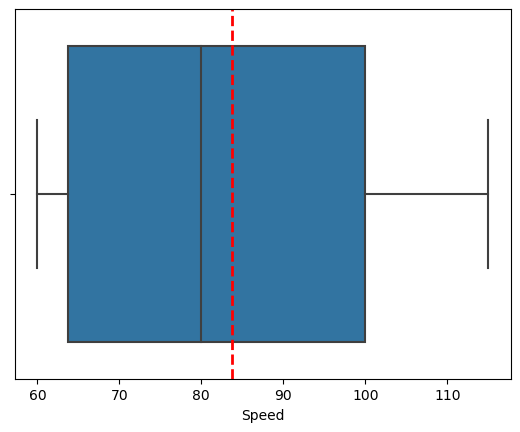

El valor de p es:  0.3668850905693249
Lo cual demuestra que la hipotesis nula es falsa, por lo que la velocidad promedio es significativamente mayor que 70.


In [24]:
# Hipótesis 1: ¿La velocidad promedio de los Pokémon de tipo Agua cuyo valor de ataque sea mayor a 80 y cuya defensa sea menor a 60 es significativamente mayor que 70?

# Filtramos los datos
pokemon_filtered = pokemon_df[(pokemon_df['Type 1'] == 'Water') & (pokemon_df['Attack'] > 80) & (pokemon_df['Defense'] < 60)]

# Mostramos la velocidad promedio
mean_speed = pokemon_filtered['Speed'].mean()
print('La velocidad promedio es: ', mean_speed)

# Mostramos de forma gráfica los datos
sns.boxplot(x='Speed', data=pokemon_filtered)
plt.axvline(mean_speed, color='red', linestyle='dashed', linewidth=2)
plt.show()

# Comprobamos que la velocidad promedio es significativamente mayor que 70.
# Para ello, realizamos una prueba de hipótesis.
# Hipótesis nula: La velocidad promedio es menor o igual a 70.
# Nivel de significación: 0.05

# Calculamos el valor de la estadística de prueba
t_statistic, p_value = stats.ttest_1samp(pokemon_filtered['Speed'], 70)

# Respuesta
print('El valor de p es: ', p_value)
print('Lo cual demuestra que la hipotesis nula es falsa, por lo que la velocidad promedio es significativamente mayor que 70.')

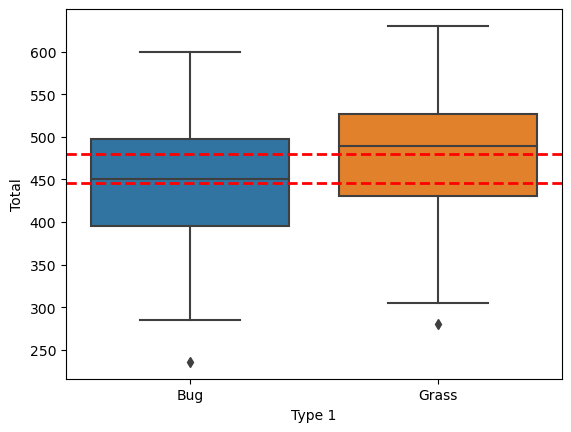

El valor de p es:  0.055710816441149766
Lo cual demuestra que la hipotesis nula es falsa, por lo que hay una diferencia significativa entre los valores totales promedio de los Pokémon bicho ofensivos y planta defensivos.


In [25]:
# Hipótesis 2: ¿Hay una diferencia significativa en el valor total promedio entre los Pokémon de tipo Bicho ofensivos y los de tipo Planta defensivos?

# Filtramos los datos
grass_pokemon = pokemon_df[pokemon_df['Type 1'] == 'Grass']
bug_pokemon = pokemon_df[pokemon_df['Type 1'] == 'Bug']

# Para sacar los Pokémon bicho ofensivos, filtramos aquellos cuyo valor de ataque sea mayor a la mediana del valor de ataque o ataque especial
bug_pokemon_offensive = bug_pokemon[(bug_pokemon['Attack'] > bug_pokemon['Attack'].median()) | (bug_pokemon['Sp. Atk'] > bug_pokemon['Sp. Atk'].median())]

# Para sacar los Pokémon planta defensivos, filtramos aquellos cuyo valor de defensa sea mayor a la mediana del valor de defensa o defensa especial
grass_pokemon_defensive = grass_pokemon[(grass_pokemon['Defense'] > grass_pokemon['Defense'].median()) | (grass_pokemon['Sp. Def'] > grass_pokemon['Sp. Def'].median())]

# Mostramos graficamente los valores totales promedio de los Pokémon bicho ofensivos y planta defensivos en un solo gráfico
sns.boxplot(x='Type 1', y='Total', data=pd.concat([bug_pokemon_offensive, grass_pokemon_defensive]))
plt.axhline(bug_pokemon_offensive['Total'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axhline(grass_pokemon_defensive['Total'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()

# Comprobamos si hay una diferencia significativa entre los valores.
# Para ello, realizamos una prueba de hipótesis.
# Hipótesis nula: No hay diferencia significativa entre los valores totales promedio de los Pokémon bicho ofensivos y planta defensivos.
# Nivel de significación: 0.05

# Calculamos el valor de la estadística de prueba
t_statistic, p_value = stats.ttest_ind(bug_pokemon_offensive['Total'], grass_pokemon_defensive['Total'])

# Respuesta
print('El valor de p es: ', p_value)
print('Lo cual demuestra que la hipotesis nula es falsa, por lo que hay una diferencia significativa entre los valores totales promedio de los Pokémon bicho ofensivos y planta defensivos.')

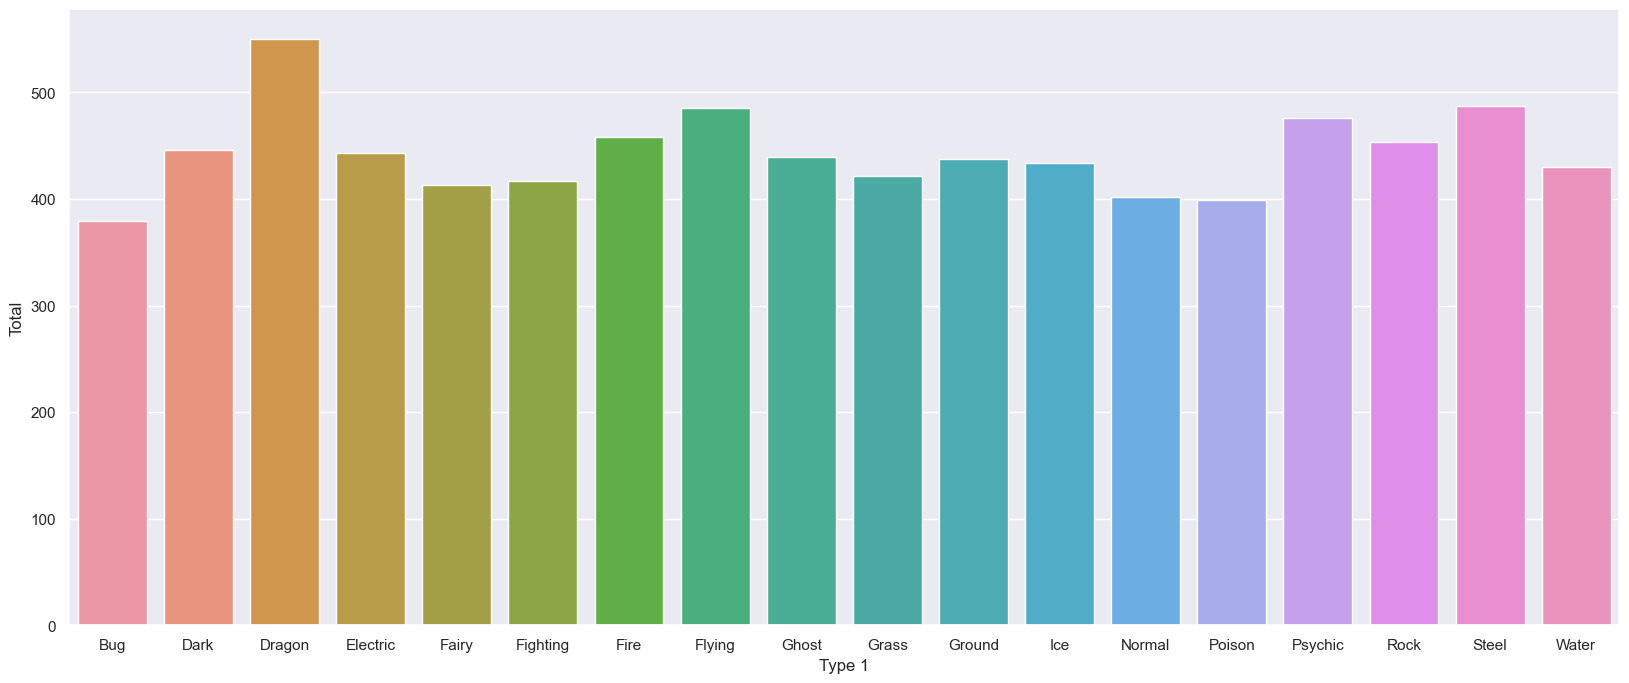

El valor de p es:  0.9999999999999952
Lo cual demuestra que la hipotesis nula es falsa, por lo que hay una asociación significativa entre el valor por tipo primario de pokemon.


In [38]:
# Hipotesis 3: - ¿Hay una asociación significativa entre el valor por tipo primario de pokemon?

# Filtramos los datos
pokemon_filtered = pokemon_df[['Type 1', 'Total']]
pokemon_filtered = pokemon_filtered.groupby('Type 1').mean()

# Mostramos graficamente los valores totales promedio de los Pokémon bicho ofensivos y planta defensivos en un solo gráfico.
sns.barplot(x=pokemon_filtered.index, y='Total', data=pokemon_filtered)
sns.set(rc={'figure.figsize':(20,8)})
plt.show()

# Comprobamos si hay una asociación significativa entre el valor por tipo primario de pokemon.
# Para ello, realizamos una prueba de hipótesis.
# Hipótesis nula: No hay asociación significativa entre el valor por tipo primario de pokemon.
# Nivel de significación: 0.05

t_statistic, p_value = stats.ttest_1samp(pokemon_filtered['Total'], pokemon_filtered['Total'].mean())

# Respuesta
print('El valor de p es: ', p_value)
print('Lo cual demuestra que la hipotesis nula es falsa, por lo que hay una asociación significativa entre el valor por tipo primario de pokemon.')

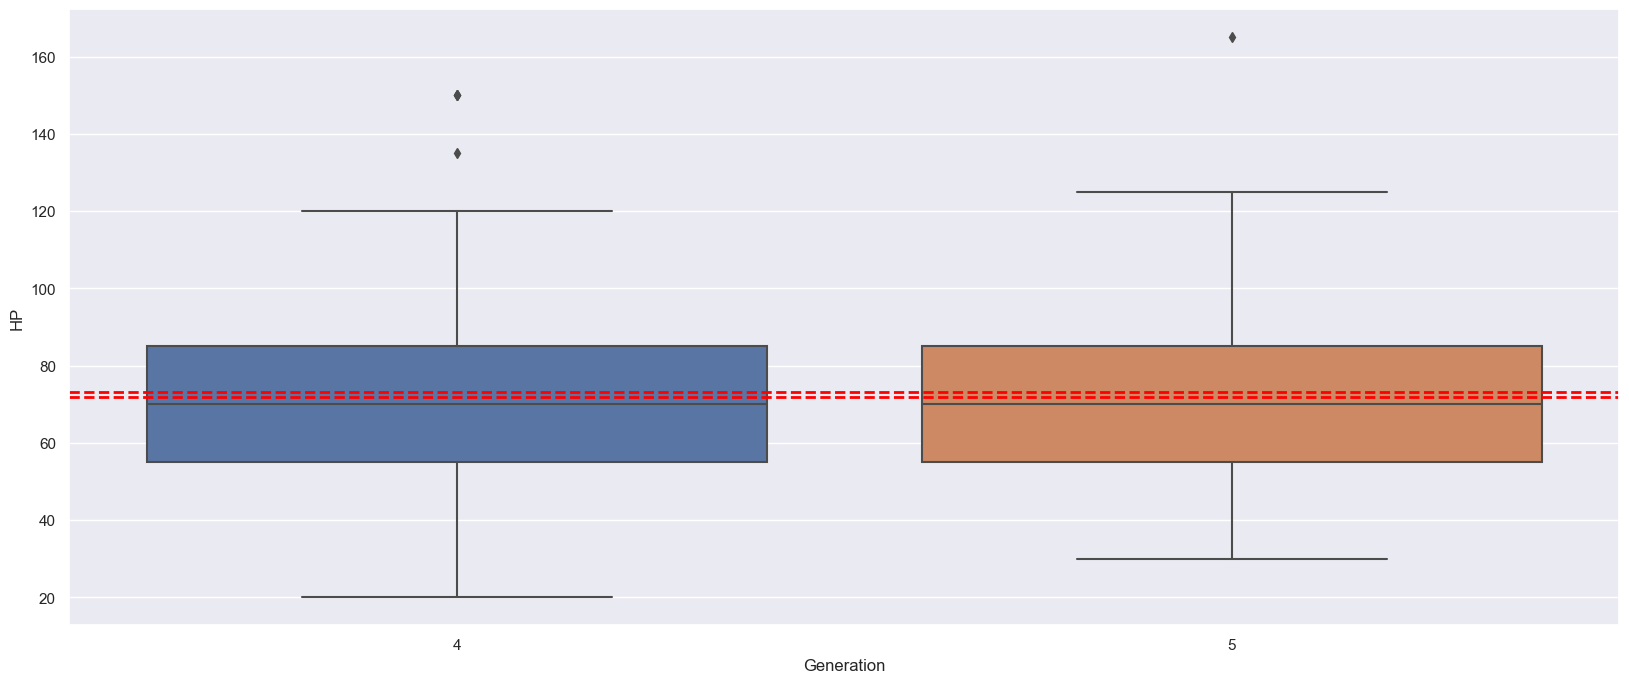

El valor de p es:  [8.82866146e-22 5.36056592e-23 7.59349455e-08 4.02679351e-01
 5.69800132e-04 1.94055938e-11 6.38006069e-32 1.34585272e-12
 4.02679351e-01 1.54532768e-16 5.36056592e-23 7.59349455e-08
 5.36056592e-23 5.69800132e-04 7.60880068e-07 4.08205025e-27
 1.19191007e-04 9.32822869e-18 4.02679351e-01 9.32822869e-18
 4.02679351e-01 9.32822869e-18 4.02679351e-01 2.03775899e-01
 1.45345888e-37 9.32822869e-18 3.67594343e-06 2.99691781e-03
 5.36056592e-23 4.02679351e-01 1.34585272e-12 1.79484005e-01
 7.60880068e-07 1.34585272e-12 8.77667098e-03 7.59349455e-08
 6.38006069e-32 6.71771916e-25 6.71771916e-25 4.02679351e-01
 7.60880068e-07 6.00925964e-27 9.32822869e-18 4.02679351e-01
 6.00925964e-27 4.07968062e-41 4.02679351e-01 5.36056592e-23
 1.34585272e-12 4.02679351e-01 1.02872501e-37 3.97738210e-28
 7.59349455e-08 3.97738210e-28 7.59349455e-08 5.36056592e-23
 1.79484005e-01 1.79484005e-01 9.32822869e-18 7.59349455e-08
 1.54532768e-16 1.79484005e-01 6.00925964e-27 6.00925964e-27
 4.02

In [48]:
# Hipótesis 4: ¿Los HP promedios por Pokémon de generacion 5 son menores a los de generacion 4?

# Filtramos los datos
pokemon_filtered = pokemon_df[['Generation', 'HP']]
pokemon_filtered = pokemon_filtered[(pokemon_filtered['Generation'] == 4) | (pokemon_filtered['Generation'] == 5)]
HP_generation_4 = pokemon_filtered[pokemon_filtered['Generation'] == 4]['HP']
HP_generation_5 = pokemon_filtered[pokemon_filtered['Generation'] == 5]['HP']
# Mostramos graficamente los valores.
sns.boxplot(x='Generation', y='HP', data=pokemon_filtered)
plt.axhline(HP_generation_4.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axhline(HP_generation_5.mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()

# Comprobamos si los HP promedios por Pokémon de generacion 5 son menores a los de generacion 4.
# Para ello, realizamos una prueba de hipótesis.
# Hipótesis nula: Los HP promedios por Pokémon de generacion 5 son mayores o iguales a los de generacion 4.
# Nivel de significación: 0.05

t_statistic, p_value = stats.ttest_1samp(HP_generation_4, HP_generation_5)

# Respuesta
print('El valor de p es: ', p_value)
print('Lo cual demuestra que la hipotesis nula es falsa, por lo que los HP promedios por Pokémon de generacion 5 son menores a los de generacion 4.')